In [ ]:
import timeit
import time

import scipy
from scipy.optimize import newton
import matplotlib.pyplot as plt
import regex
import math
import numpy as np
import random   # allows random number generation
random.seed(1234)

In [3]:
n = 10**6



### Newton's Method

In [41]:
def F(x,u):
  return ((1 - x)*np.exp(-x)) - u

U = [random.uniform(0,1) for _ in range(n)]

In [ ]:
%%timeit
[newton(F,1,args=(u,)) for u in U]

1min 43s ± 2.64 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [42]:
X = [newton(F,1,args=(u,)) for u in U]
len([x for x in X if x <= 0]) # verify all roots positive

0

### Acceptance-Rejection Method

In [7]:
X = [-2*math.log(random.uniform(0,0.5)) for _ in range(n)]
len([x for x in X if x <= 0])

U = [random.uniform(0,1) for _ in range(n)]

In [40]:
# original distribution
def f(x):
    return x * np.exp(-x)

# proposal
def g(x):
    return 0.5 * np.exp(-0.5*x)

# optimum scale for proposal to distribution
c = 4*math.exp(-1)

In [18]:
%%timeit
accepted = []

while len(accepted) < n:
    x = -2*math.log(random.uniform(0,0.5))
    u = random.uniform(0,1)
    if u <= f(x)/(c*g(x)):
        accepted.append(x)

504 ms ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
len(accepted)

1000000

### Sum of Two Gamma Distributions

In [ ]:
# before seeing U(0,1) * U(0,1) ~ U(0,1)
%%timeit
[-math.log(random.uniform(0,1)*random.uniform(0,1)) for _ in range(n)]

222 ms ± 34.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Plots

In [55]:
X = [-math.log(random.uniform(0,1)*random.uniform(0,1)) for _ in range(n)]

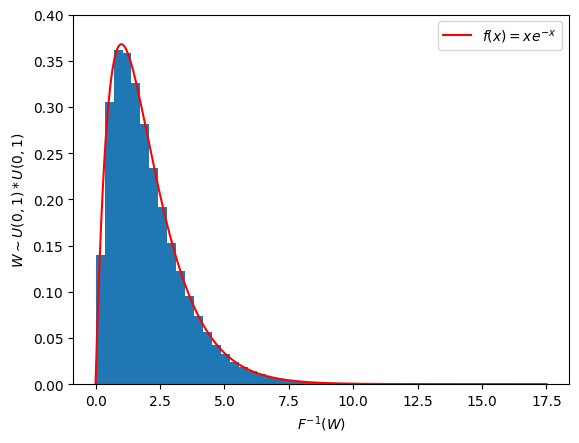

In [76]:
def f(x):
    return x*np.exp(-x)

x = np.linspace(0,17.5,1000)

plt.hist(X, 50, density=True)
plt.plot(x, f(x),'red', label = r"$f(x)=x e^{-x}$")
plt.ylabel(r'$W\sim U(0,1)*U(0,1)$')
plt.xlabel(r'$F^{-1}(W)$')
plt.ylim(0,0.4)
plt.legend()